# 📺 View channels

In [ ]:
#| default_exp repr_chans

In [ ]:
# |hide
from nbdev.showdoc import *
from lovely_numpy import lo


In [ ]:
# |hide
# |export
import numpy as np

from lovely_numpy.repr_rgb import rgb
from lovely_numpy.utils.colormap import InfCmap, get_cmap

In [ ]:
# |export

def chans(  t: np.ndarray,      # Input tensor 
            cmap = "twilight",  # Use matplotlib colormap by this name
            cm_below="blue", cm_above="red",
            cm_ninf="cyan", cm_pinf="fuchsia",
            cm_nan="yellow",
            gutter_px=3,   # Draw write gutters when tiling the images
            frame_px=1,    # Draw black frame around each image
            scale=1,       # Stretch the image. Only itegers please.
            cl=True,
            view_width=966):    
    """
    Process individual channels of a tensor that can be interpreted as as image
    `x` and `y` specify which dimensions should be used as spatial ones.
    """
    
    assert t.ndim >= 2, f"Expected a 2+ dim input, got {t.shape}={t.ndim}"
    if t.ndim == 2: t = t[None]
    
    if cl: # Convert to [..., C, H, W].
        t = np.swapaxes(np.swapaxes(t, -2, -1), -3, -2)

    ### XXX Do we want a way to pass a custom cmap instead of mpl one?
    inf_cmap = InfCmap(cmap=get_cmap(cmap),
                  below=cm_below, above=cm_above,
                  nan=cm_nan, ninf=cm_ninf, pinf=cm_pinf)

    return rgb(inf_cmap(t), cl=True, gutter_px=gutter_px, frame_px=frame_px, scale=scale, view_width=view_width)


array[196, 196, 3] n=115248 x∈[0., 1.000] μ=0.361 σ=0.248


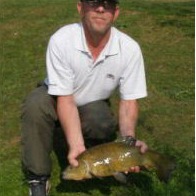

In [ ]:
in_stats = ( (0.485, 0.456, 0.406), (0.229, 0.224, 0.225) )

image = np.load("mysteryman.npy").transpose(1,2,0)
image = ((image * np.array(in_stats[1])) + np.array(in_stats[0])).clip(0, 1)

print(lo(image))
rgb(image)

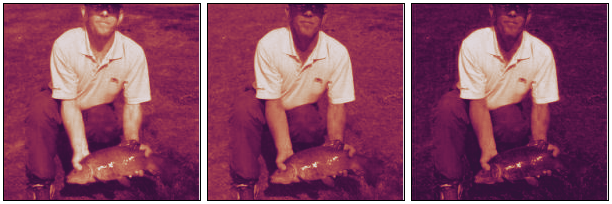

In [ ]:
chans(image)

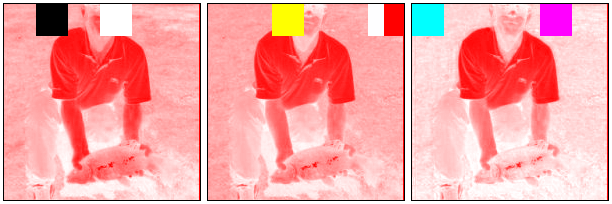

In [ ]:
# In R
image[0:32, 32:64,  0] = -1.1 # Below min
image[0:32, 96:128, 0] = 1.1 # Above max
# In G
image[0:32, 64:96,  1] = float("nan")

# In B
image[0:32, 0:32,   2] = float("-inf")
image[0:32, 128:160,2] = float("+inf")

image[0:32, 160:176,1] = 0.
image[0:32, 176:   ,1] = 1.

chans(image, cmap="bwr", cm_below="black", cm_above="white")

In [ ]:
lo(np.stack([image]*4))

array[4, 196, 196, 3] n=460992 x∈[-1.100, 1.100] μ=0.360 σ=0.298 +Inf! -Inf! NaN!

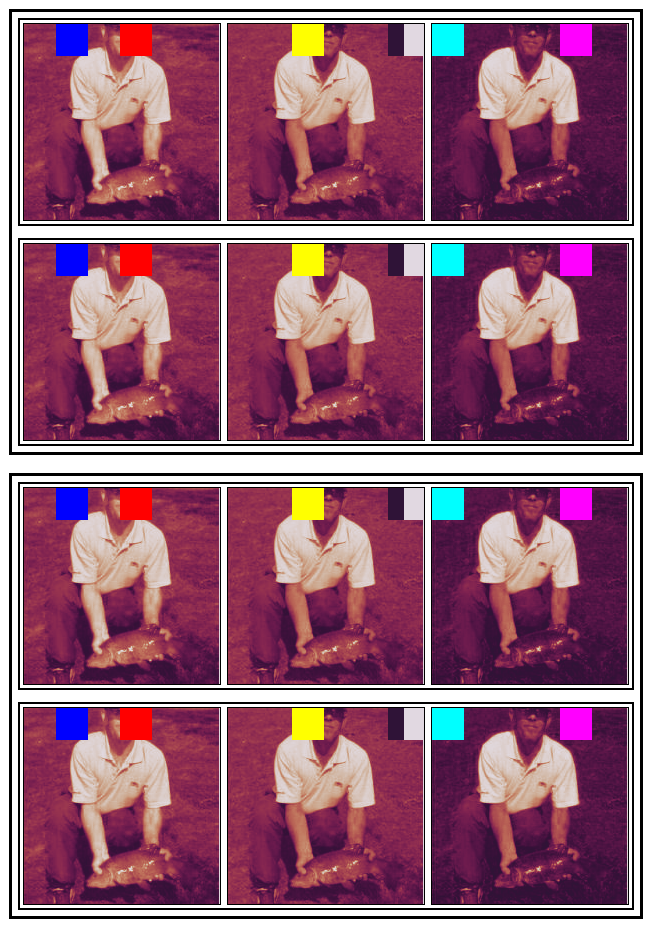

In [ ]:
# 4 images, stacked 2x2
chans(np.stack([image]*4).reshape((2,2,196,196,3)))

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()